In [1]:
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
nltk.corpus.gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [3]:
num_chars = []
num_words = []
num_sent = []
num_vocab = []
file_id = []
from nltk.corpus import gutenberg
for fileid in gutenberg.fileids():
    num_chars.append(len(gutenberg.raw(fileid)))
    num_words.append(len(gutenberg.words(fileid)))
    num_sent.append(len(gutenberg.sents(fileid)))
    num_vocab.append(len(set(w.lower() for w in gutenberg.words(fileid))))
    file_id.append(fileid)

In [4]:
df = pd.DataFrame({'num_chars':num_chars,'num_words':num_words,'num_sent':num_sent,'num_vocab':num_vocab},index = file_id)

In [5]:
df['average_word_length'] = df['num_chars']/df['num_words']
df['average_sentence_length'] = df['num_words']/df['num_sent']
df['number_of_time_each_vocabulary_item_appears'] = df['num_words']/df['num_vocab']

In [6]:
df

,num_chars,num_words,num_sent,num_vocab,average_word_length,average_sentence_length,number_of_time_each_vocabulary_item_appears
austen-emma.txt,887071,192427,7752,7344,4.609909,24.822884,26.201934
austen-persuasion.txt,466292,98171,3747,5835,4.749794,26.199893,16.824507
austen-sense.txt,673022,141576,4999,6403,4.753786,28.320864,22.110886
bible-kjv.txt,4332554,1010654,30103,12767,4.286882,33.573199,79.161432
blake-poems.txt,38153,8354,438,1535,4.567034,19.073059,5.442345
bryant-stories.txt,249439,55563,2863,3940,4.489300,19.407265,14.102284
burgess-busterbrown.txt,84663,18963,1054,1559,4.464642,17.991461,12.163566
carroll-alice.txt,144395,34110,1703,2636,4.233216,20.029360,12.940061
chesterton-ball.txt,457450,96996,4779,8335,4.716174,20.296296,11.637193
chesterton-brown.txt,406629,86063,3806,7794,4.724783,22.612454,11.042212


In [7]:
len(gutenberg.raw('blake-poems.txt')) #raw tells how many letters appears in a text this also includes spaces between the words

38153

In [8]:
# the sents() function divides the text up into sentences where each sentence is a list of word
macbeth_sentences = gutenberg.sents('shakespeare-macbeth.txt')

In [9]:
macbeth_sentences

[['[', 'The', 'Tragedie', 'of', 'Macbeth', 'by', 'William', 'Shakespeare', '1603', ']'], ['Actus', 'Primus', '.'], ...]

In [10]:
# lets check 1116th sentence
macbeth_sentences[1116]

['Double',
 ',',
 'double',
 ',',
 'toile',
 'and',
 'trouble',
 ';',
 'Fire',
 'burne',
 ',',
 'and',
 'Cauldron',
 'bubble']

In [11]:
#in shakespeare-macbeth lets find out the longest sentences
max_len = max(len(w) for w in gutenberg.sents('shakespeare-macbeth.txt'))
[s for s in macbeth_sentences if len(s) == max_len]

[['Doubtfull',
  'it',
  'stood',
  ',',
  'As',
  'two',
  'spent',
  'Swimmers',
  ',',
  'that',
  'doe',
  'cling',
  'together',
  ',',
  'And',
  'choake',
  'their',
  'Art',
  ':',
  'The',
  'mercilesse',
  'Macdonwald',
  '(',
  'Worthie',
  'to',
  'be',
  'a',
  'Rebell',
  ',',
  'for',
  'to',
  'that',
  'The',
  'multiplying',
  'Villanies',
  'of',
  'Nature',
  'Doe',
  'swarme',
  'vpon',
  'him',
  ')',
  'from',
  'the',
  'Westerne',
  'Isles',
  'Of',
  'Kernes',
  'and',
  'Gallowgrosses',
  'is',
  'supply',
  "'",
  'd',
  ',',
  'And',
  'Fortune',
  'on',
  'his',
  'damned',
  'Quarry',
  'smiling',
  ',',
  'Shew',
  "'",
  'd',
  'like',
  'a',
  'Rebells',
  'Whore',
  ':',
  'but',
  'all',
  "'",
  's',
  'too',
  'weake',
  ':',
  'For',
  'braue',
  'Macbeth',
  '(',
  'well',
  'hee',
  'deserues',
  'that',
  'Name',
  ')',
  'Disdayning',
  'Fortune',
  ',',
  'with',
  'his',
  'brandisht',
  'Steele',
  ',',
  'Which',
  'smoak',
  "'",
  'd',
 

In [12]:
from nltk.corpus import webtext
for fileid in webtext.fileids():
    print(webtext.raw(fileid)[:65],'...............')

Cookie Manager: "Don't allow sites that set removed cookies to se ...............
SCENE 1: [wind] [clop clop clop] 
KING ARTHUR: Whoa there!  [clop ...............
White guy: So, do you have any plans for this evening?
Asian girl ...............
PIRATES OF THE CARRIBEAN: DEAD MAN'S CHEST, by Ted Elliott & Terr ...............
25 SEXY MALE, seeks attrac older single lady, for discreet encoun ...............
Lovely delicate, fragrant Rhone wine. Polished leather and strawb ...............


In [13]:
webtext.raw('pirates.txt')[:65]

"PIRATES OF THE CARRIBEAN: DEAD MAN'S CHEST, by Ted Elliott & Terr"

In [14]:
from nltk.corpus import nps_chat

In [15]:
nps_chat.fileids()

['10-19-20s_706posts.xml',
 '10-19-30s_705posts.xml',
 '10-19-40s_686posts.xml',
 '10-19-adults_706posts.xml',
 '10-24-40s_706posts.xml',
 '10-26-teens_706posts.xml',
 '11-06-adults_706posts.xml',
 '11-08-20s_705posts.xml',
 '11-08-40s_706posts.xml',
 '11-08-adults_705posts.xml',
 '11-08-teens_706posts.xml',
 '11-09-20s_706posts.xml',
 '11-09-40s_706posts.xml',
 '11-09-adults_706posts.xml',
 '11-09-teens_706posts.xml']

In [16]:
from nltk.corpus import nps_chat
nps_chat.posts('10-19-20s_706posts.xml')[123]

['i',
 'do',
 "n't",
 'want',
 'hot',
 'pics',
 'of',
 'a',
 'female',
 ',',
 'I',
 'can',
 'look',
 'in',
 'a',
 'mirror',
 '.']

In [17]:
from nltk.corpus import brown
brown.categories()

['adventure',
 'belles_lettres',
 'editorial',
 'fiction',
 'government',
 'hobbies',
 'humor',
 'learned',
 'lore',
 'mystery',
 'news',
 'religion',
 'reviews',
 'romance',
 'science_fiction']

In [18]:
brown.words(categories = 'news')

['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', ...]

In [19]:
brown.words(fileids = 'ca01')

['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', ...]

In [20]:
#brown.words(fileids = 'ca02')
print(brown.words(fileids = ['cg22']))

['Does', 'our', 'society', 'have', 'a', 'runaway', ',', ...]


In [21]:
#compare genres in their usage of modal words
brown.sents(categories = ['adventure','editorial','fiction'])

[['Assembly', 'session', 'brought', 'much', 'good'], ['The', 'General', 'Assembly', ',', 'which', 'adjourns', 'today', ',', 'has', 'performed', 'in', 'an', 'atmosphere', 'of', 'crisis', 'and', 'struggle', 'from', 'the', 'day', 'it', 'convened', '.'], ...]

In [22]:
brown.words(categories = ['adventure','editorial','fiction'])

['Assembly', 'session', 'brought', 'much', 'good', ...]

In [23]:
# lets compare the genres in their usage of modal varbs
from nltk.corpus import brown
modals  = ['can','could','may','might','must','ought','shall','should','will']
news_test = brown.words(categories = 'news')
fdist = nltk.FreqDist(w.lower() for w in news_test)
for words in modals:
    print(words,fdist[words])

can 94
could 87
may 93
might 38
must 53
ought 1
shall 5
should 61
will 389


In [24]:
from nltk.corpus import brown
wh_words = ['what','when','where','who','why']
fdist = nltk.FreqDist(w.lower() for w in brown.words(categories = 'government'))
for wh_word in wh_words:
    print(wh_word,'-->',fdist[wh_word])

what --> 58
when --> 68
where --> 48
who --> 77
why --> 6


In [25]:
from nltk.corpus import brown

In [26]:
conditional_frequency_distribution = nltk.ConditionalFreqDist(
    (genre,words)
    for genre in brown.categories()
    for words in brown.words(categories = genre)

)

In [27]:
cfd = nltk.ConditionalFreqDist(
    (genre,words)
    for genre in brown.categories()
    for words in brown.words(categories = genre)

)
genres = ['adventure','belles_lettres','editorial','fiction','government','hobbies']
modals = ['can','could','might','must','will']

In [28]:
cfd[1]

FreqDist({})

In [29]:
arr1 = []
arr2 = []
arr3 = []


for val in genres:
    for val1 in modals:
        arr1.append(val)
        arr2.append(val1)
        arr3.append(cfd[val][val1])
        print(val,val1,cfd[val][val1])

adventure can 46
adventure could 151
adventure might 58
adventure must 27
adventure will 50
belles_lettres can 246
belles_lettres could 213
belles_lettres might 113
belles_lettres must 170
belles_lettres will 236
editorial can 121
editorial could 56
editorial might 39
editorial must 53
editorial will 233
fiction can 37
fiction could 166
fiction might 44
fiction must 55
fiction will 52
government can 117
government could 38
government might 13
government must 102
government will 244
hobbies can 268
hobbies could 58
hobbies might 22
hobbies must 83
hobbies will 264


In [30]:
pd.DataFrame({'genre':arr1,'modals':arr2,'value':arr3}).set_index(['genre','modals'])

value
genre          modals       
adventure      can        46
               could     151
               might      58
               must       27
               will       50
belles_lettres can       246
               could     213
               might     113
               must      170
               will      236
editorial      can       121
               could      56
               might      39
               must       53
               will      233
fiction        can        37
               could     166
               might      44
               must       55
               will       52
government     can       117
               could      38
               might      13
               must      102
               will      244
hobbies        can       268
               could      58
               might      22
               must       83
               will      264

In [31]:
from nltk.corpus import reuters

In [32]:
reuters.fileids()

['test/14826',
 'test/14828',
 'test/14829',
 'test/14832',
 'test/14833',
 'test/14839',
 'test/14840',
 'test/14841',
 'test/14842',
 'test/14843',
 'test/14844',
 'test/14849',
 'test/14852',
 'test/14854',
 'test/14858',
 'test/14859',
 'test/14860',
 'test/14861',
 'test/14862',
 'test/14863',
 'test/14865',
 'test/14867',
 'test/14872',
 'test/14873',
 'test/14875',
 'test/14876',
 'test/14877',
 'test/14881',
 'test/14882',
 'test/14885',
 'test/14886',
 'test/14888',
 'test/14890',
 'test/14891',
 'test/14892',
 'test/14899',
 'test/14900',
 'test/14903',
 'test/14904',
 'test/14907',
 'test/14909',
 'test/14911',
 'test/14912',
 'test/14913',
 'test/14918',
 'test/14919',
 'test/14921',
 'test/14922',
 'test/14923',
 'test/14926',
 'test/14928',
 'test/14930',
 'test/14931',
 'test/14932',
 'test/14933',
 'test/14934',
 'test/14941',
 'test/14943',
 'test/14949',
 'test/14951',
 'test/14954',
 'test/14957',
 'test/14958',
 'test/14959',
 'test/14960',
 'test/14962',
 'test/149

In [33]:
reuters.categories()

['acq',
 'alum',
 'barley',
 'bop',
 'carcass',
 'castor-oil',
 'cocoa',
 'coconut',
 'coconut-oil',
 'coffee',
 'copper',
 'copra-cake',
 'corn',
 'cotton',
 'cotton-oil',
 'cpi',
 'cpu',
 'crude',
 'dfl',
 'dlr',
 'dmk',
 'earn',
 'fuel',
 'gas',
 'gnp',
 'gold',
 'grain',
 'groundnut',
 'groundnut-oil',
 'heat',
 'hog',
 'housing',
 'income',
 'instal-debt',
 'interest',
 'ipi',
 'iron-steel',
 'jet',
 'jobs',
 'l-cattle',
 'lead',
 'lei',
 'lin-oil',
 'livestock',
 'lumber',
 'meal-feed',
 'money-fx',
 'money-supply',
 'naphtha',
 'nat-gas',
 'nickel',
 'nkr',
 'nzdlr',
 'oat',
 'oilseed',
 'orange',
 'palladium',
 'palm-oil',
 'palmkernel',
 'pet-chem',
 'platinum',
 'potato',
 'propane',
 'rand',
 'rape-oil',
 'rapeseed',
 'reserves',
 'retail',
 'rice',
 'rubber',
 'rye',
 'ship',
 'silver',
 'sorghum',
 'soy-meal',
 'soy-oil',
 'soybean',
 'strategic-metal',
 'sugar',
 'sun-meal',
 'sun-oil',
 'sunseed',
 'tea',
 'tin',
 'trade',
 'veg-oil',
 'wheat',
 'wpi',
 'yen',
 'zinc']

In [34]:
reuters.categories('training/9865')

['barley', 'corn', 'grain', 'wheat']

In [35]:
reuters.categories(['training/9865','training/9880'])

['barley', 'corn', 'grain', 'money-fx', 'wheat']

In [36]:
reuters.fileids('barley')

['test/15618',
 'test/15649',
 'test/15676',
 'test/15728',
 'test/15871',
 'test/15875',
 'test/15952',
 'test/17767',
 'test/17769',
 'test/18024',
 'test/18263',
 'test/18908',
 'test/19275',
 'test/19668',
 'training/10175',
 'training/1067',
 'training/11208',
 'training/11316',
 'training/11885',
 'training/12428',
 'training/13099',
 'training/13744',
 'training/13795',
 'training/13852',
 'training/13856',
 'training/1652',
 'training/1970',
 'training/2044',
 'training/2171',
 'training/2172',
 'training/2191',
 'training/2217',
 'training/2232',
 'training/3132',
 'training/3324',
 'training/395',
 'training/4280',
 'training/4296',
 'training/5',
 'training/501',
 'training/5467',
 'training/5610',
 'training/5640',
 'training/6626',
 'training/7205',
 'training/7579',
 'training/8213',
 'training/8257',
 'training/8759',
 'training/9865',
 'training/9958']

In [37]:
reuters.fileids(['barley','corn'])

['test/14832',
 'test/14858',
 'test/15033',
 'test/15043',
 'test/15106',
 'test/15287',
 'test/15341',
 'test/15618',
 'test/15648',
 'test/15649',
 'test/15676',
 'test/15686',
 'test/15720',
 'test/15728',
 'test/15845',
 'test/15856',
 'test/15860',
 'test/15863',
 'test/15871',
 'test/15875',
 'test/15877',
 'test/15890',
 'test/15904',
 'test/15906',
 'test/15910',
 'test/15911',
 'test/15917',
 'test/15952',
 'test/15999',
 'test/16012',
 'test/16071',
 'test/16099',
 'test/16147',
 'test/16525',
 'test/16624',
 'test/16751',
 'test/16765',
 'test/17503',
 'test/17509',
 'test/17722',
 'test/17767',
 'test/17769',
 'test/18024',
 'test/18035',
 'test/18263',
 'test/18482',
 'test/18614',
 'test/18908',
 'test/18954',
 'test/18973',
 'test/19165',
 'test/19275',
 'test/19668',
 'test/19721',
 'test/19821',
 'test/20018',
 'test/20366',
 'test/20637',
 'test/20645',
 'test/20649',
 'test/20723',
 'test/20763',
 'test/21091',
 'test/21243',
 'test/21493',
 'training/10120',
 'trai

In [38]:
# in case of reuters ccorpus the categories overlap each other simply because a story genrally covers multiple topics
reuters.words('training/9865')[:14]

['FRENCH',
 'FREE',
 'MARKET',
 'CEREAL',
 'EXPORT',
 'BIDS',
 'DETAILED',
 'French',
 'operators',
 'have',
 'requested',
 'licences',
 'to',
 'export']

In [39]:
reuters.words(['training/9865','training/9880'])

['FRENCH', 'FREE', 'MARKET', 'CEREAL', 'EXPORT', ...]

In [40]:
reuters.words(categories = 'barley')

['FRENCH', 'FREE', 'MARKET', 'CEREAL', 'EXPORT', ...]

In [41]:
reuters.words(categories = ['barley','corn'])

['THAI', 'TRADE', 'DEFICIT', 'WIDENS', 'IN', 'FIRST', ...]

In [42]:
cfd = nltk.ConditionalFreqDist(
    (target,fileid[:4])
    for fileid in ina.fileids()
    for w in ina.words(fileid)
    for target in ['america','citizen']
    if w.lower().startswith(target)

)
cfd.plot()

NameError: name 'ina' is not defined

In [43]:
cfd = nltk.ConditionalFreqDist(
    (target,fileid[:4])
    for fileid in ina.fileids()
    for w in ina.words(fileid)
    for target in ['america','citizen']
    if w.lower().startswith(target)

)

NameError: name 'ina' is not defined

In [44]:
plt.figure(figsize = (20,5))
cfd.plot()

TypeError: '<' not supported between instances of 'int' and 'str'

<Figure size 1440x360 with 0 Axes>

In [45]:
# lets use conditional frequency distribution to examine the differences in the word length for a selection of languages in udhr corpus 
#which contains the declaration of human rights in various languages
nltk.corpus.udhr.fileids()

['Abkhaz-Cyrillic+Abkh',
 'Abkhaz-UTF8',
 'Achehnese-Latin1',
 'Achuar-Shiwiar-Latin1',
 'Adja-UTF8',
 'Afaan_Oromo_Oromiffa-Latin1',
 'Afrikaans-Latin1',
 'Aguaruna-Latin1',
 'Akuapem_Twi-UTF8',
 'Albanian_Shqip-Latin1',
 'Amahuaca',
 'Amahuaca-Latin1',
 'Amarakaeri-Latin1',
 'Amuesha-Yanesha-UTF8',
 'Arabela-Latin1',
 'Arabic_Alarabia-Arabic',
 'Asante-UTF8',
 'Ashaninca-Latin1',
 'Asheninca-Latin1',
 'Asturian_Bable-Latin1',
 'Aymara-Latin1',
 'Balinese-Latin1',
 'Bambara-UTF8',
 'Baoule-UTF8',
 'Basque_Euskara-Latin1',
 'Batonu_Bariba-UTF8',
 'Belorus_Belaruski-Cyrillic',
 'Belorus_Belaruski-UTF8',
 'Bemba-Latin1',
 'Bengali-UTF8',
 'Beti-UTF8',
 'Bichelamar-Latin1',
 'Bikol_Bicolano-Latin1',
 'Bora-Latin1',
 'Bosnian_Bosanski-Cyrillic',
 'Bosnian_Bosanski-Latin2',
 'Bosnian_Bosanski-UTF8',
 'Breton-Latin1',
 'Bugisnese-Latin1',
 'Bulgarian_Balgarski-Cyrillic',
 'Bulgarian_Balgarski-UTF8',
 'Cakchiquel-Latin1',
 'Campa_Pajonalino-Latin1',
 'Candoshi-Shapra-Latin1',
 'Caquinte-Latin

In [46]:
nltk.corpus.udhr.words('Javanese-Latin1')[11:]

['Saben', 'umat', 'manungsa', 'lair', 'kanthi', 'hak', ...]

In [47]:
from nltk.corpus import udhr
languages = ['Chickasaw', 'English', 'German_Deutsch','Greenlandic_Inuktikut', 'Hungarian_Magyar', 'Ibibio_Efik']
cfd = nltk.ConditionalFreqDist(
    (lang,len(word))
    for lang in languages
    for word in udhr.words(lang+'-Latin1')

)

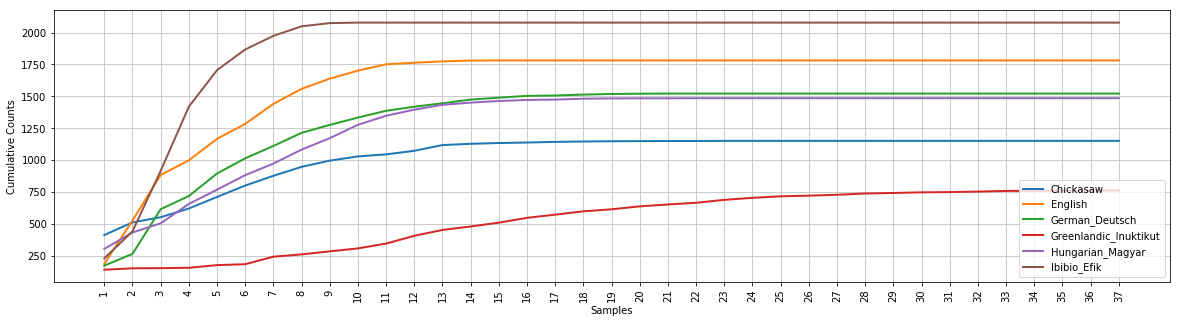

In [48]:
plt.figure(figsize = (20,5))
cfd.plot(cumulative = True)

In [49]:
df = pd.DataFrame(udhr.fileids())

In [50]:
df[df[0].str.endswith('UTF8')][:10].values.tolist()

[['Abkhaz-UTF8'],
 ['Adja-UTF8'],
 ['Akuapem_Twi-UTF8'],
 ['Amuesha-Yanesha-UTF8'],
 ['Asante-UTF8'],
 ['Bambara-UTF8'],
 ['Baoule-UTF8'],
 ['Batonu_Bariba-UTF8'],
 ['Belorus_Belaruski-UTF8'],
 ['Bengali-UTF8']]

In [51]:
languages = ['Abkhaz','Adja','Akuapem_Twi','Amuesha-Yanesha','Asante','Bambara','Baoule','Batonu_Bariba','Belorus_Belaruski','Bengali']
from nltk.corpus import udhr
cfd = nltk.ConditionalFreqDist(
    (lang,len(words))
    for lang in languages
    for words in udhr.words(lang+'-UTF8')
)

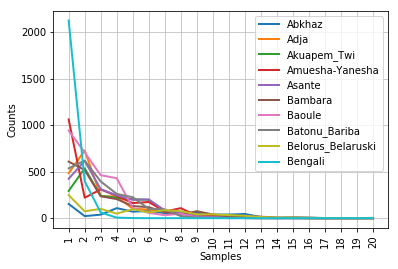

In [52]:
cfd.plot()

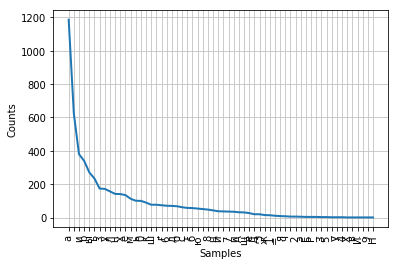

In [53]:
raw_text = udhr.raw('Abkhaz-UTF8')
nltk.FreqDist(raw_text).plot()

1. fileids():The files of the corpus
# 2. fileids([categories]):The files of the corpus corresponding to the particular mentioned category
# 3. categories(): The categories of the corpus 
# 4. categories([fileids]): The categories of the corpus corresponding to these files
# 5. raw():The raw content of the corpus
# 6. raw(fileids = [f1,f2,f3]):The raw content of the corpus corresponding to these files
# 7. raw(categories = [c1,c2,c3]):The raw content of the specified categories
# 8. words:The words ot the whole corpus
# 9. words(fileids = [f1,f2,f3]):The words of specified files
# 10. words(categories = [c1,c2,c3]):The words of specified categories
# 11. sents():The sentences of the whole corpus
# 12. sents(fileids = [f1,f2,f3]):The sentences of specified files
# 13. sents(categories = [c1,c2,c3]):The sentences of specified categories
# 
#

In [54]:
from nltk.corpus import gutenberg
raw = gutenberg.raw('burgess-busterbrown.txt')
print('raw',raw[1:20])
words = gutenberg.words('burgess-busterbrown.txt')
print('words',words[1:20])
sents = gutenberg.sents('burgess-busterbrown.txt')
print('sents',sents[1:20])

raw The Adventures of B
words ['The', 'Adventures', 'of', 'Buster', 'Bear', 'by', 'Thornton', 'W', '.', 'Burgess', '1920', ']', 'I', 'BUSTER', 'BEAR', 'GOES', 'FISHING', 'Buster', 'Bear']
sents [['I'], ['BUSTER', 'BEAR', 'GOES', 'FISHING'], ['Buster', 'Bear', 'yawned', 'as', 'he', 'lay', 'on', 'his', 'comfortable', 'bed', 'of', 'leaves', 'and', 'watched', 'the', 'first', 'early', 'morning', 'sunbeams', 'creeping', 'through', 'the', 'Green', 'Forest', 'to', 'chase', 'out', 'the', 'Black', 'Shadows', '.'], ['Once', 'more', 'he', 'yawned', ',', 'and', 'slowly', 'got', 'to', 'his', 'feet', 'and', 'shook', 'himself', '.'], ['Then', 'he', 'walked', 'over', 'to', 'a', 'big', 'pine', '-', 'tree', ',', 'stood', 'up', 'on', 'his', 'hind', 'legs', ',', 'reached', 'as', 'high', 'up', 'on', 'the', 'trunk', 'of', 'the', 'tree', 'as', 'he', 'could', ',', 'and', 'scratched', 'the', 'bark', 'with', 'his', 'great', 'claws', '.'], ['After', 'that', 'he', 'yawned', 'until', 'it', 'seemed', 'as', 'if', 'hi

In [55]:
# conditional frequencr distribution
from nltk.corpus import brown
cdf = nltk.ConditionalFreqDist(
    (genre,word)
    for genre in brown.categories()
    for word in brown.words(categories = genre)

)

In [56]:
genre_words = [(genre,word) 
              for genre in ['news','romance'] 
              for word in brown.words(categories = genre)]

In [57]:
genre_words

[('news', 'The'),
 ('news', 'Fulton'),
 ('news', 'County'),
 ('news', 'Grand'),
 ('news', 'Jury'),
 ('news', 'said'),
 ('news', 'Friday'),
 ('news', 'an'),
 ('news', 'investigation'),
 ('news', 'of'),
 ('news', "Atlanta's"),
 ('news', 'recent'),
 ('news', 'primary'),
 ('news', 'election'),
 ('news', 'produced'),
 ('news', '``'),
 ('news', 'no'),
 ('news', 'evidence'),
 ('news', "''"),
 ('news', 'that'),
 ('news', 'any'),
 ('news', 'irregularities'),
 ('news', 'took'),
 ('news', 'place'),
 ('news', '.'),
 ('news', 'The'),
 ('news', 'jury'),
 ('news', 'further'),
 ('news', 'said'),
 ('news', 'in'),
 ('news', 'term-end'),
 ('news', 'presentments'),
 ('news', 'that'),
 ('news', 'the'),
 ('news', 'City'),
 ('news', 'Executive'),
 ('news', 'Committee'),
 ('news', ','),
 ('news', 'which'),
 ('news', 'had'),
 ('news', 'over-all'),
 ('news', 'charge'),
 ('news', 'of'),
 ('news', 'the'),
 ('news', 'election'),
 ('news', ','),
 ('news', '``'),
 ('news', 'deserves'),
 ('news', 'the'),
 ('news', 'p

In [58]:
genre_words[:4]

[('news', 'The'), ('news', 'Fulton'), ('news', 'County'), ('news', 'Grand')]

In [59]:
genre_words[-4:]

[('romance', 'afraid'),
 ('romance', 'not'),
 ('romance', "''"),
 ('romance', '.')]

In [60]:
cfd = nltk.ConditionalFreqDist(genre_words)

In [61]:
cfd

<ConditionalFreqDist with 2 conditions>

In [62]:
cfd.conditions()

['news', 'romance']

In [63]:
cfd['news']

FreqDist({'the': 5580, ',': 5188, '.': 4030, 'of': 2849, 'and': 2146, 'to': 2116, 'a': 1993, 'in': 1893, 'for': 943, 'The': 806, ...})

In [64]:
cfd['romance']

FreqDist({',': 3899, '.': 3736, 'the': 2758, 'and': 1776, 'to': 1502, 'a': 1335, 'of': 1186, '``': 1045, "''": 1044, 'was': 993, ...})

In [65]:
cfd['romance'].most_common(20)

[(',', 3899),
 ('.', 3736),
 ('the', 2758),
 ('and', 1776),
 ('to', 1502),
 ('a', 1335),
 ('of', 1186),
 ('``', 1045),
 ("''", 1044),
 ('was', 993),
 ('I', 951),
 ('in', 875),
 ('he', 702),
 ('had', 692),
 ('?', 690),
 ('her', 651),
 ('that', 583),
 ('it', 573),
 ('his', 559),
 ('she', 496)]

In [66]:
from nltk.corpus import inaugural
cfd = nltk.ConditionalFreqDist(
    (target,fileid[:4])
    for fileid in inaugural.fileids()
    for w in inaugural.words(fileid)
    for target in ['american','citizen']
    if w.lower().startswith(target)

)

In [67]:
from nltk.corpus import udhr
languages = ['English', 'German_Deutsch','Greenlandic_Inuktikut', 'Hungarian_Magyar', 'Ibibio_Efik','Chickasaw', ]
cfd = nltk.ConditionalFreqDist(
    (lang,len(word))
    for lang in languages
    for word in udhr.words(lang+'-Latin1')

)

In [68]:
#cfd.tabulate(conditions=['English']) # words in corpus for condition english
cfd.tabulate(conditions = ['German_Deutsch','English'],samples = range(10))

                 0   1   2   3   4   5   6   7   8   9 
German_Deutsch   0 171  92 351 103 177 119  97 103  62 
       English   0 185 340 358 114 169 117 157 118  80 


In [69]:
[
    (lang,len(word))
    for lang in languages
    for word in udhr.words(lang+'-Latin1')

]

[('English', 9),
 ('English', 11),
 ('English', 2),
 ('English', 5),
 ('English', 6),
 ('English', 8),
 ('English', 7),
 ('English', 11),
 ('English', 2),
 ('English', 3),
 ('English', 8),
 ('English', 7),
 ('English', 3),
 ('English', 2),
 ('English', 3),
 ('English', 5),
 ('English', 3),
 ('English', 11),
 ('English', 6),
 ('English', 2),
 ('English', 3),
 ('English', 7),
 ('English', 2),
 ('English', 3),
 ('English', 5),
 ('English', 6),
 ('English', 2),
 ('English', 3),
 ('English', 10),
 ('English', 2),
 ('English', 7),
 ('English', 1),
 ('English', 7),
 ('English', 3),
 ('English', 5),
 ('English', 2),
 ('English', 3),
 ('English', 5),
 ('English', 1),
 ('English', 7),
 ('English', 9),
 ('English', 3),
 ('English', 8),
 ('English', 3),
 ('English', 5),
 ('English', 6),
 ('English', 4),
 ('English', 8),
 ('English', 2),
 ('English', 9),
 ('English', 4),
 ('English', 5),
 ('English', 4),
 ('English', 8),
 ('English', 3),
 ('English', 10),
 ('English', 2),
 ('English', 7),
 ('Englis

In [70]:
days = ['monday','tuesday','wednesday','thursday','friday','saturday','sunday']
from nltk.corpus import brown
cfd = nltk.ConditionalFreqDist(
    [(genre,word.lower()) #key value pair where key is genre and values are words in each case of this comb
    #the category is news and later in this news there exists a word and number of times that word is repeating in the text 
    for genre in ['news','romance']
    for word in brown.words(categories = genre)]

)

genre_word = [(genre, word.lower()) 
               for genre in ['news', 'romance'] 
                  for word in brown.words(categories=genre)
          ]

In [71]:
cfd['news']

FreqDist({'the': 6386, ',': 5188, '.': 4030, 'of': 2861, 'and': 2186, 'to': 2144, 'a': 2130, 'in': 2020, 'for': 969, 'that': 829, ...})

In [72]:
cfd['romance']

FreqDist({',': 3899, '.': 3736, 'the': 2988, 'and': 1905, 'to': 1517, 'a': 1383, 'of': 1202, 'he': 1068, '``': 1045, "''": 1044, ...})

In [73]:
cdf.tabulate(samples = ['love','hate','friend'])

                  love   hate friend 
      adventure      9      8     10 
 belles_lettres     68      4     49 
      editorial     13      0      3 
        fiction     16      9      4 
     government      1      0      0 
        hobbies      6      0      4 
          humor      4      0      7 
        learned     13      2      4 
           lore     19      2     15 
        mystery      7      2     14 
           news      3      1      2 
       religion     13      3      2 
        reviews      7      2      5 
        romance     32      9      5 
science_fiction      3      0      1 


In [74]:
cfd.tabulate(samples = days)

           monday   tuesday wednesday  thursday    friday  saturday    sunday 
   news        54        43        22        20        41        33        51 
romance         2         3         3         1         3         4         5 


In [75]:
sent = ['In', 'the', 'beginning', 'God', 'created', 'the', 'heaven','and', 'the', 'earth', '.']

In [76]:
list(nltk.bigrams(sent))

[('In', 'the'),
 ('the', 'beginning'),
 ('beginning', 'God'),
 ('God', 'created'),
 ('created', 'the'),
 ('the', 'heaven'),
 ('heaven', 'and'),
 ('and', 'the'),
 ('the', 'earth'),
 ('earth', '.')]

In [77]:
def generate_model(cfdist,word,num = 15):
    for i in range(num):
        print(word,end = ' ')
        word = cfdist[word].max()

In [78]:
text = nltk.corpus.genesis.words('english-kjv.txt')
bigrams = nltk.bigrams(text)

In [79]:
cfd = nltk.ConditionalFreqDist(bigrams)

In [80]:
cfd['water']

FreqDist({',': 9, ';': 3, '.': 3, 'the': 2, 'in': 2, 'of': 2, 'was': 1, 'at': 1, 'for': 1, 'to': 1, ...})

In [81]:
cfd['living'].max()

'creature'

In [82]:
cfd['creature'].max()

'that'

In [83]:
text = nltk.corpus.genesis.words('english-kjv.txt')
bigrams = nltk.bigrams(text)
cfd = nltk.ConditionalFreqDist(bigrams)
def sentence_genrator(cfd,word,num = 15):
    for i in range(num):
        print(word,end = ' ')
        word = cfd[word].max()

In [84]:
sentence_genrator(cfd,'living',num = 18)

living creature that he said , and the land of the land of the land of the land 

* cfdist = ConditionalFreqDist(pairs) : create a  conditional frequency distribution from a list of pairs
# * cfdist.conditions() : the conditions
# * cfdist[conditions] : the frequency distribution of this condition
# * cfdist[conditions][samples] : frequency for given samples for this condition
# * cfdist.tabulate() : tabulate the conditional frequency distribution
# * cfdist.tabulate(samples,conditions) : tabulation limited to specified conditions and frequencies
#

In [85]:
def lexical_diversity(text):
    return len(set(text))/len(text)

In [86]:
def lexical_diversity(my_text_data):
    word_count = len(my_text_data)
    vocab_size = len(set(my_text_data))
    diversity_score = vocab_size / word_count
    return diversity_score

In [87]:
lexical_diversity(nltk.corpus.genesis.words('english-kjv.txt'))

0.06230453042623537

In [88]:
word = 'siddharth'
word[:-1]

'siddhart'

In [89]:
word[-2:]

'th'

In [90]:
word[-1]

'h'

In [91]:
word[:-2]

'siddhar'

In [92]:
def plural(word):
    if word.endswith('y'):
        return word[:-1] +'ies'
    elif word[-1] in 'sx' or word[-2:] in ['sh','ch']:
        return word + 'es'
    elif word.endswith('an'):
        return word[:-2] + 'en'
    else:
        return word + 's'

In [93]:
plural('fairy')

'fairies'

In [94]:
plural('woman')

'women'

In [95]:
# wordlist corpora is used by many spell checkers to check spellings
text = nltk.corpus.gutenberg.words('austen-sense.txt')
text_vocab = set(w.lower() for w in text if w.isalpha())
english_vocab = set(w.lower() for w in nltk.corpus.words.words())

In [96]:
unusual_words = text_vocab - english_vocab

In [97]:
len(unusual_words)

1601

In [98]:
# checking unusual word
text = nltk.corpus.nps_chat.words()
text_vocab = set(w.lower() for w in text if w.isalpha())
english_vocab = set(w.lower() for w in nltk.corpus.words.words())
unusual_words = text_vocab - english_vocab

In [99]:
len(unusual_words)

2095

In [100]:
def unusual_words(text):
    text_vocab = set(w.lower() for w in text if w.isalpha())
    english_vocab = set(w.lower() for w in nltk.corpus.words.words())
    length = len(text_vocab - english_vocab)
    return length

In [101]:
print(unusual_words(nltk.corpus.gutenberg.words('austen-sense.txt')))

1601


In [102]:
print(unusual_words(nltk.corpus.nps_chat.words()))

2095


In [103]:
from nltk.corpus import stopwords

In [104]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [105]:
nltk.corpus.stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [106]:
stopwords = nltk.corpus.stopwords.words('english')
text = nltk.corpus.reuters.words()
content = [w for w in text if w.lower() not in stopwords] # words that do not belong to stopwords category
len(content)/len(text)

0.735240435097661

In [107]:
stopwords = nltk.corpus.stopwords.words('english')
text = nltk.corpus.nps_chat.words()
content = [w for w in text if w.lower() not in stopwords]
print('percent of words that are not stopwords',len(content)/len(text))

percent of words that are not stopwords 0.7097756054210176


In [108]:
def content_fraction(text):
    stopwords = nltk.corpus.stopwords.words('english')
    content = [w for w in text if w.lower() not in stopwords]
    print(len(content) / len(text))
    

In [109]:
def content_fraction(text):
     stopwords = nltk.corpus.stopwords.words('english')
     content = [w for w in text if w.lower() not in stopwords]
     return len(content) / len(text)

content_fraction(nltk.corpus.reuters.words())

0.735240435097661

In [110]:
puzzle_letters = nltk.FreqDist('egivrvonl')
obligatory = 'r'
wordlist = nltk.corpus.words.words()
[w for w in wordlist if len(w) >= 6 and obligatory in w and nltk.FreqDist(w) <= puzzle_letters]

['glover',
 'gorlin',
 'govern',
 'grovel',
 'ignore',
 'involver',
 'lienor',
 'linger',
 'longer',
 'lovering',
 'noiler',
 'overling',
 'region',
 'renvoi',
 'revolving',
 'ringle',
 'roving',
 'violer',
 'virole']

In [111]:
puzzle_letters = nltk.FreqDist('shubhamshah')

wordlist = nltk.corpus.words.words()
len([w for w in wordlist if len(w) > 1 and nltk.FreqDist(w) <= puzzle_letters])

101

In [112]:
nltk.corpus.names.fileids()

['female.txt', 'male.txt']

In [113]:
from nltk.corpus import names

In [114]:
names.fileids()

['female.txt', 'male.txt']

In [115]:
female_names = nltk.corpus.names.words('female.txt')
male_names = nltk.corpus.names.words('male.txt')
len([w for w in female_names if w in male_names])

365

In [116]:
names = nltk.corpus.names
cfd = nltk.ConditionalFreqDist(
    (fileid,name[-1])
    for fileid in names.fileids()
    for name in names.words(fileid)

)

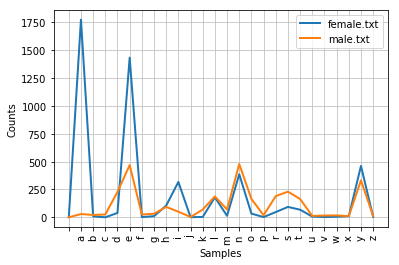

In [117]:
cfd.plot()

In [118]:
names = nltk.corpus.names
cfd23232 = nltk.ConditionalFreqDist(
    (fileid,name[-1])
    for fileid in names.fileids()
    for name in names.words(fileid)

)




In [119]:
entries = nltk.corpus.cmudict.entries()
entries[42371:42379]

[('fir', ['F', 'ER1']),
 ('fire', ['F', 'AY1', 'ER0']),
 ('fire', ['F', 'AY1', 'R']),
 ('firearm', ['F', 'AY1', 'ER0', 'AA2', 'R', 'M']),
 ('firearm', ['F', 'AY1', 'R', 'AA2', 'R', 'M']),
 ('firearms', ['F', 'AY1', 'ER0', 'AA2', 'R', 'M', 'Z']),
 ('firearms', ['F', 'AY1', 'R', 'AA2', 'R', 'M', 'Z']),
 ('fireball', ['F', 'AY1', 'ER0', 'B', 'AO2', 'L'])]

In [120]:
for word,pron in nltk.corpus.cmudict.entries():
    if len(pron) == 3:
        p1,p2,p3 = pron
        if p1 == 'F' and p3 == 'R':
            print(word,p2)
    

fahr AA1
fair EH1
faire EH1
far AA1
fare EH1
farr AA1
faure AO1
fear IH1
fehr EH1
fer EH1
ferre EH1
fier IH1
fire AY1
foor UH1
for AO1
fore AO1
forr AO1
four AO1
fuhr UH1
pfarr AA1
phair EH1
phar AA1
pharr AA1


In [121]:
nltk.corpus.cmudict.entries()[100:107]

[('abdication', ['AE2', 'B', 'D', 'IH0', 'K', 'EY1', 'SH', 'AH0', 'N']),
 ('abdnor', ['AE1', 'B', 'D', 'N', 'ER0']),
 ('abdo', ['AE1', 'B', 'D', 'OW0']),
 ('abdollah', ['AE2', 'B', 'D', 'AA1', 'L', 'AH0']),
 ('abdomen', ['AE0', 'B', 'D', 'OW1', 'M', 'AH0', 'N']),
 ('abdomen', ['AE1', 'B', 'D', 'AH0', 'M', 'AH0', 'N']),
 ('abdominal', ['AE0', 'B', 'D', 'AA1', 'M', 'AH0', 'N', 'AH0', 'L'])]

In [122]:
# the nltk.corpus.cmudict.entries() cosnists of a word and its data-structure in this case we want to find words in the corpus whose
#last four syllables are as given in the array in this case we are finding words which end with nics
#in this case we can observe that one pronunciation 
syllable = ['N', 'IH0', 'K', 'S']
entries = nltk.corpus.cmudict.entries()
[word for word,pron in entries if pron[-4:] == syllable]

["atlantic's",
 'audiotronics',
 'avionics',
 'beatniks',
 'calisthenics',
 'centronics',
 'chamonix',
 'chetniks',
 "clinic's",
 'clinics',
 'conics',
 'conics',
 'cryogenics',
 'cynics',
 'diasonics',
 "dominic's",
 'ebonics',
 'electronics',
 "electronics'",
 "endotronics'",
 'endotronics',
 'enix',
 'environics',
 'ethnics',
 'eugenics',
 'fibronics',
 'flextronics',
 'harmonics',
 'hispanics',
 'histrionics',
 'identics',
 'ionics',
 'kibbutzniks',
 'lasersonics',
 'lumonics',
 'mannix',
 'mechanics',
 "mechanics'",
 'microelectronics',
 'minix',
 'minnix',
 'mnemonics',
 'mnemonics',
 'molonicks',
 'mullenix',
 'mullenix',
 'mullinix',
 'mulnix',
 "munich's",
 'nucleonics',
 'onyx',
 'organics',
 "panic's",
 'panics',
 'penix',
 'pennix',
 'personics',
 'phenix',
 "philharmonic's",
 'phoenix',
 'phonics',
 'photronics',
 'pinnix',
 'plantronics',
 'pyrotechnics',
 'refuseniks',
 "resnick's",
 'respironics',
 'sconnix',
 'siliconix',
 'skolniks',
 'sonics',
 'sputniks',
 'technics

In [123]:
# lets find the missmatches between the syllables in english we know there are some words whose inding syllable is M but
# actually in writing we end them in n lets find such words from nltk.corpus.cmudict.entries()
[word for word,pron in entries if pron[-1] == 'M' and word[-1] == 'n' ]

['autumn', 'column', 'condemn', 'damn', 'goddamn', 'hymn', 'solemn']

In [124]:
# 0:no stress
# 1:primary stress
# 2:secondary stress

In [125]:
# we define a function to extract the stress digit and then scan our lexicon to find words having particular stress pattern
nltk.corpus.cmudict.entries()[67:77]

[('abbett', ['AH0', 'B', 'EH1', 'T']),
 ('abbeville', ['AE1', 'B', 'V', 'IH0', 'L']),
 ('abbey', ['AE1', 'B', 'IY0']),
 ("abbey's", ['AE1', 'B', 'IY0', 'Z']),
 ('abbie', ['AE1', 'B', 'IY0']),
 ('abbitt', ['AE1', 'B', 'IH0', 'T']),
 ('abbot', ['AE1', 'B', 'AH0', 'T']),
 ('abbotstown', ['AE1', 'B', 'AH0', 'T', 'S', 'T', 'AW1', 'N']),
 ('abbott', ['AE1', 'B', 'AH0', 'T']),
 ("abbott's", ['AE1', 'B', 'AH0', 'T', 'S'])]

In [126]:
def stress(pron):
    return [char for phone in pron for char in phone if char.isdigit()]



#01020
#02010

In [127]:
def stress(pron):
    return [char for phone in pron for char in phone if char.isdigit()]

In [128]:
[word for word,pron in nltk.corpus.cmudict.entries() if stress(pron) == ['0','1','0','2','0']][:2]

['abbreviated', 'abbreviated']

In [129]:
[word for word,pron in nltk.corpus.cmudict.entries() if stress(pron) == ['0','2','0','1','0']][:10]

['abbreviation',
 'abbreviations',
 'abomination',
 'abortifacient',
 'abortifacients',
 'academicians',
 'accommodation',
 'accommodations',
 'accreditation',
 'accreditations']

In [130]:
# we can use conditiona frequency distribution yo find out minimally contrasting sets of words
# here we find words consisting of three sounds and group them according to their first and last sounds
[(pron[0] + '-' + pron[2],words) 
 for (word,pron) in entries 
 if pron[0] == 'P' and len(pron) == 3]
# in this case we are taking word and pronunciation combination from nltk.corpus.cmudict.entries() and if the first pronunciation
# of the selected word is P and and length of the word is equal to three then we are taking first and last character from that array






[('P-P', ['[', 'The', 'Adventures', 'of', 'Buster', 'Bear', ...]),
 ('P-P', ['[', 'The', 'Adventures', 'of', 'Buster', 'Bear', ...]),
 ('P-R', ['[', 'The', 'Adventures', 'of', 'Buster', 'Bear', ...]),
 ('P-SH', ['[', 'The', 'Adventures', 'of', 'Buster', 'Bear', ...]),
 ('P-K', ['[', 'The', 'Adventures', 'of', 'Buster', 'Bear', ...]),
 ('P-S', ['[', 'The', 'Adventures', 'of', 'Buster', 'Bear', ...]),
 ('P-K', ['[', 'The', 'Adventures', 'of', 'Buster', 'Bear', ...]),
 ('P-D', ['[', 'The', 'Adventures', 'of', 'Buster', 'Bear', ...]),
 ('P-K', ['[', 'The', 'Adventures', 'of', 'Buster', 'Bear', ...]),
 ('P-TH', ['[', 'The', 'Adventures', 'of', 'Buster', 'Bear', ...]),
 ('P-F', ['[', 'The', 'Adventures', 'of', 'Buster', 'Bear', ...]),
 ('P-JH', ['[', 'The', 'Adventures', 'of', 'Buster', 'Bear', ...]),
 ('P-L', ['[', 'The', 'Adventures', 'of', 'Buster', 'Bear', ...]),
 ('P-IY0', ['[', 'The', 'Adventures', 'of', 'Buster', 'Bear', ...]),
 ('P-D', ['[', 'The', 'Adventures', 'of', 'Buster', 'Bear

In [131]:

# here we find words consisting of three sounds and group them according to their first and last sounds
[(pron[0] + '-' + pron[2],word) 
 for (word,pron) in entries 
 if pron[0] == 'P' and len(pron) == 3]
#cfd = nltk.ConditionalFreqDist(p3)

[('P-P', 'paap'),
 ('P-P', 'paape'),
 ('P-R', 'paar'),
 ('P-SH', 'paasch'),
 ('P-K', 'pac'),
 ('P-S', 'pace'),
 ('P-K', 'pack'),
 ('P-D', 'pad'),
 ('P-K', 'paek'),
 ('P-TH', 'paeth'),
 ('P-F', 'paff'),
 ('P-JH', 'page'),
 ('P-L', 'pahl'),
 ('P-IY0', 'pai'),
 ('P-D', 'paid'),
 ('P-JH', 'paige'),
 ('P-N', 'paign'),
 ('P-K', 'paik'),
 ('P-L', 'pail'),
 ('P-L', 'paille'),
 ('P-N', 'pain'),
 ('P-N', 'paine'),
 ('P-R', 'pair'),
 ('P-Z', 'pais'),
 ('P-T', 'pait'),
 ('P-Z', 'paiz'),
 ('P-K', 'pak'),
 ('P-K', 'pake'),
 ('P-L', 'pal'),
 ('P-L', 'pale'),
 ('P-L', 'pall'),
 ('P-L', 'pall'),
 ('P-M', 'palm'),
 ('P-M', 'palme'),
 ('P-M', 'pam'),
 ('P-N', 'pan'),
 ('P-N', 'pane'),
 ('P-NG', 'pang'),
 ('P-Z', "pao's"),
 ('P-P', 'pap'),
 ('P-P', 'pape'),
 ('P-P', 'papp'),
 ('P-K', 'paque'),
 ('P-R', 'par'),
 ('P-R', 'pare'),
 ('P-R', 'parr'),
 ('P-Z', 'pas'),
 ('P-SH', 'pash'),
 ('P-S', 'pass'),
 ('P-S', 'pasts'),
 ('P-T', 'pat'),
 ('P-CH', 'patch'),
 ('P-T', 'pate'),
 ('P-TH', 'path'),
 ('P-TH', 'path

In [132]:
for template in sorted(cfd.conditions()):
    if len(cfd[template]) > 10:
        words = sorted(cfd[template])
        wordstring = ''.join(words)
        print(template,wordstring[:67])

female.txt  abdefghijklmnoprstuvwxyz
male.txt abcdefghijklmnoprstuvwxyz


In [133]:
sorted(cfd.conditions())

['female.txt', 'male.txt']

In [134]:
entries = nltk.corpus.cmudict.entries()
entity = [(pron[0] + '-' +pron[2],word)
          for word,pron in entries
          if pron[0] == 'P' and len(pron) == 3]
cfd = nltk.ConditionalFreqDist(entity)

for template in sorted(cfd.conditions()):
    if len(cfd[template]) > 10:
        words = sorted(cfd[template])
        wordstring = ' '.join(words)
        print(template,wordstring)

P-CH patch pautsch peach perch petsch petsche piche piech pietsch pitch pitsch poach poche pooch pouch puche putsch
P-K pac pack paek paik pak pake paque peak peake pech peck peek perc perk pic pick pik pike pique poch pock poke polk puck purk pyke
P-L pahl pail paille pal pale pall paul paule paull peal peale pearl pearle peel peele pehl peil pell pelle perl perle piehl piel pihl pil pile pill pille poehl pohl pol pole poll pool poole poul puhl pull pyle
P-N paign pain paine pan pane pawn payne peine pen penh penn pin pine pinn pon poon pun pyne
P-P paap paape pap pape papp paup peep pep pip pipe pipp poop pop pope popp poppe pup
P-R paar pair par pare parr pear peer pier poor poore por pore porr pour
P-S pace pass pasts peace pearse pease perce pers perse pesce piece piss pos poss posts purse pus puss
P-T pait pat pate patt peart peat peet peete pert pet pete pett piet piette pit pitt pot pote pott pout puett purt put putt
P-UW1 peru peugh pew plew plue prew pru prue prugh pshew pugh

In [135]:
text = ['natural','language','processing']
prondict = nltk.corpus.cmudict.dict()
prondict['fire']

[['F', 'AY1', 'ER0'], ['F', 'AY1', 'R']]

In [136]:
prondict['blog'] = [['B','L','A']]

In [137]:
prondict['blog']

[['B', 'L', 'A']]

In [138]:
prondict = nltk.corpus.cmudict.dict()
for val in text:
    print(val,prondict[val])

natural [['N', 'AE1', 'CH', 'ER0', 'AH0', 'L'], ['N', 'AE1', 'CH', 'R', 'AH0', 'L']]
language [['L', 'AE1', 'NG', 'G', 'W', 'AH0', 'JH'], ['L', 'AE1', 'NG', 'G', 'W', 'IH0', 'JH']]
processing [['P', 'R', 'AA1', 'S', 'EH0', 'S', 'IH0', 'NG']]


In [139]:
[ph for w in text for ph in prondict[w][0]]

['N',
 'AE1',
 'CH',
 'ER0',
 'AH0',
 'L',
 'L',
 'AE1',
 'NG',
 'G',
 'W',
 'AH0',
 'JH',
 'P',
 'R',
 'AA1',
 'S',
 'EH0',
 'S',
 'IH0',
 'NG']

In [140]:
prondict = nltk.corpus.cmudict.dict()
text = ['natural','language','processing']
[ph for w in text for ph in prondict[w][0]][:10]

['N', 'AE1', 'CH', 'ER0', 'AH0', 'L', 'L', 'AE1', 'NG', 'G']

In [141]:
from nltk.corpus import swadesh  # this corpus consists of most common words in all the languages
# and each language is encoded as two letter word
swadesh.fileids()

['be',
 'bg',
 'bs',
 'ca',
 'cs',
 'cu',
 'de',
 'en',
 'es',
 'fr',
 'hr',
 'it',
 'la',
 'mk',
 'nl',
 'pl',
 'pt',
 'ro',
 'ru',
 'sk',
 'sl',
 'sr',
 'sw',
 'uk']

In [142]:
swadesh.words('en')

['I',
 'you (singular), thou',
 'he',
 'we',
 'you (plural)',
 'they',
 'this',
 'that',
 'here',
 'there',
 'who',
 'what',
 'where',
 'when',
 'how',
 'not',
 'all',
 'many',
 'some',
 'few',
 'other',
 'one',
 'two',
 'three',
 'four',
 'five',
 'big',
 'long',
 'wide',
 'thick',
 'heavy',
 'small',
 'short',
 'narrow',
 'thin',
 'woman',
 'man (adult male)',
 'man (human being)',
 'child',
 'wife',
 'husband',
 'mother',
 'father',
 'animal',
 'fish',
 'bird',
 'dog',
 'louse',
 'snake',
 'worm',
 'tree',
 'forest',
 'stick',
 'fruit',
 'seed',
 'leaf',
 'root',
 'bark (from tree)',
 'flower',
 'grass',
 'rope',
 'skin',
 'meat',
 'blood',
 'bone',
 'fat (noun)',
 'egg',
 'horn',
 'tail',
 'feather',
 'hair',
 'head',
 'ear',
 'eye',
 'nose',
 'mouth',
 'tooth',
 'tongue',
 'fingernail',
 'foot',
 'leg',
 'knee',
 'hand',
 'wing',
 'belly',
 'guts',
 'neck',
 'back',
 'breast',
 'heart',
 'liver',
 'drink',
 'eat',
 'bite',
 'suck',
 'spit',
 'vomit',
 'blow',
 'breathe',
 'laugh',

In [143]:
fr2en = swadesh.entries(['fr','en']) # in this way we can translate the words or compare the words from two
#corporas

In [144]:
translate  = dict(fr2en)

In [145]:
translate['chien']

'dog'

In [146]:
translate['jeter']

'throw'

In [147]:
# english - french
# english - german
# english - spanish

en2fr = nltk.corpus.swadesh.entries(['en','fr'])

In [148]:
en2fr = nltk.corpus.swadesh.entries(['en','fr'])
translate = dict(en2fr)
en2de = nltk.corpus.swadesh.entries(['en','de'])
en2es = nltk.corpus.swadesh.entries(['en','es'])
translate.update(dict(en2de))
translate.update(dict(en2es))

In [149]:
translate

{'I': 'yo',
 'you (singular), thou': 'tú, usted',
 'he': 'él',
 'we': 'nosotros',
 'you (plural)': 'vosotros, ustedes',
 'they': 'ellos, ellas',
 'this': 'este',
 'that': 'ese, aquel',
 'here': 'aquí, acá',
 'there': 'ahí, allí, allá',
 'who': 'quien',
 'what': 'que',
 'where': 'donde',
 'when': 'cuando',
 'how': 'como',
 'not': 'no',
 'all': 'todo',
 'many': 'muchos',
 'some': 'algunos, unos',
 'few': 'poco',
 'other': 'otro',
 'one': 'uno',
 'two': 'dos',
 'three': 'tres',
 'four': 'cuatro',
 'five': 'cinco',
 'big': 'grande',
 'long': 'largo',
 'wide': 'ancho',
 'thick': 'gordo',
 'heavy': 'pesado',
 'small': 'pequeño',
 'short': 'corto',
 'narrow': 'estrecho, angosto',
 'thin': 'delgado, flaco',
 'woman': 'mujer',
 'man (adult male)': 'hombre',
 'man (human being)': 'hombre',
 'child': 'niño',
 'wife': 'esposa, mujer',
 'husband': 'esposo, marido',
 'mother': 'madre',
 'father': 'padre',
 'animal': 'animal',
 'fish': 'pez, pescado',
 'bird': 'ave, pájaro',
 'dog': 'perro',
 'louse'

In [150]:
# lets compare words in various germanic and romanic languages
languages = ['en','de','nl','es','fr','pt','la']
for i in [139,140,141,142]:
    print(nltk.corpus.swadesh.entries(languages)[i])

('say', 'sagen', 'zeggen', 'decir', 'dire', 'dizer', 'dicere')
('sing', 'singen', 'zingen', 'cantar', 'chanter', 'cantar', 'canere')
('play', 'spielen', 'spelen', 'jugar', 'jouer', 'jogar, brincar', 'ludere')
('float', 'schweben', 'zweven', 'flotar', 'flotter', 'flutuar, boiar', 'fluctuare')


In [151]:
languages = ['en','de','nl','es','fr','pt','la']
for i in [139,140,141,142]:
    print(nltk.corpus.swadesh.entries(languages)[i])

('say', 'sagen', 'zeggen', 'decir', 'dire', 'dizer', 'dicere')
('sing', 'singen', 'zingen', 'cantar', 'chanter', 'cantar', 'canere')
('play', 'spielen', 'spelen', 'jugar', 'jouer', 'jogar, brincar', 'ludere')
('float', 'schweben', 'zweven', 'flotar', 'flotter', 'flutuar, boiar', 'fluctuare')


In [152]:
from nltk.corpus import toolbox
toolbox.entries('rotokas.dic')

[('kaa',
  [('ps', 'V'),
   ('pt', 'A'),
   ('ge', 'gag'),
   ('tkp', 'nek i pas'),
   ('dcsv', 'true'),
   ('vx', '1'),
   ('sc', '???'),
   ('dt', '29/Oct/2005'),
   ('ex', 'Apoka ira kaaroi aioa-ia reoreopaoro.'),
   ('xp', 'Kaikai i pas long nek bilong Apoka bikos em i kaikai na toktok.'),
   ('xe', 'Apoka is gagging from food while talking.')]),
 ('kaa',
  [('ps', 'V'),
   ('pt', 'B'),
   ('ge', 'strangle'),
   ('tkp', 'pasim nek'),
   ('arg', 'O'),
   ('vx', '2'),
   ('dt', '07/Oct/2006'),
   ('ex', 'Rera rauroro rera kaarevoi.'),
   ('xp', 'Em i holim pas em na nekim em.'),
   ('xe', 'He is holding him and strangling him.'),
   ('ex', 'Iroiro-ia oirato okoearo kaaivoi uvare rirovira kaureoparoveira.'),
   ('xp', 'Ol i pasim nek bilong man long rop bikos em i save bikhet tumas.'),
   ('xe',
    "They strangled the man's neck with rope because he was very stubborn and arrogant."),
   ('ex',
    'Oirato okoearo kaaivoi iroiro-ia. Uva viapau uvuiparoi ra vovouparo uva kopiiroi.'),
 

In [153]:
from nltk.corpus import wordnet as wn

In [154]:
wn.synsets('motorcar')

[Synset('car.n.01')]

In [155]:
wn.synset('car.n.01').lemma_names()

['car', 'auto', 'automobile', 'machine', 'motorcar']

In [156]:
wn.synset('car.n.01').definition()

'a motor vehicle with four wheels; usually propelled by an internal combustion engine'

In [157]:
wn.synset('car.n.01').examples()

['he needs a car to get to work']

In [158]:
wn.synset('car.n.01').lemmas()

[Lemma('car.n.01.car'),
 Lemma('car.n.01.auto'),
 Lemma('car.n.01.automobile'),
 Lemma('car.n.01.machine'),
 Lemma('car.n.01.motorcar')]

In [159]:
wn.lemma('car.n.01.automobile')

Lemma('car.n.01.automobile')

In [160]:
wn.synsets('car')

[Synset('car.n.01'),
 Synset('car.n.02'),
 Synset('car.n.03'),
 Synset('car.n.04'),
 Synset('cable_car.n.01')]

In [161]:
for synset in wn.synsets('car'):
    print(synset.lemma_names())

['car', 'auto', 'automobile', 'machine', 'motorcar']
['car', 'railcar', 'railway_car', 'railroad_car']
['car', 'gondola']
['car', 'elevator_car']
['cable_car', 'car']


In [162]:
wn.lemmas('car')

[Lemma('car.n.01.car'),
 Lemma('car.n.02.car'),
 Lemma('car.n.03.car'),
 Lemma('car.n.04.car'),
 Lemma('cable_car.n.01.car')]

In [163]:
wn.synsets('dish')

[Synset('dish.n.01'),
 Synset('dish.n.02'),
 Synset('dish.n.03'),
 Synset('smasher.n.02'),
 Synset('dish.n.05'),
 Synset('cup_of_tea.n.01'),
 Synset('serve.v.06'),
 Synset('dish.v.02')]

In [164]:
for synset in wn.synsets('dish'):
    print(synset.lemma_names())

['dish']
['dish']
['dish', 'dishful']
['smasher', 'stunner', 'knockout', 'beauty', 'ravisher', 'sweetheart', 'peach', 'lulu', 'looker', 'mantrap', 'dish']
['dish', 'dish_aerial', 'dish_antenna', 'saucer']
['cup_of_tea', 'bag', 'dish']
['serve', 'serve_up', 'dish_out', 'dish_up', 'dish']
['dish']


In [165]:
motor_car = wn.synset('car.n.01')
types_of_motorcar = motor_car.hyponyms()
sorted(lemma.name() for synset in types_of_motorcar for lemma in synset.lemmas())
types_of_motorcar[1].lemmas()[0].name()

'beach_wagon'

In [166]:
# write a code to find the hyponynm of a synset
from nltk.corpus import wordnet as wn
motor_car = wn.synset('car.n.01')
types_of_motorcar = motor_car.hyponyms()

In [167]:
#sorted(synset.lemma_names() for synset in types_of_motorcar)
sorted(lemma.name() for synset in types_of_motorcar for lemma in synset.lemmas())

['Model_T',
 'S.U.V.',
 'SUV',
 'Stanley_Steamer',
 'ambulance',
 'beach_waggon',
 'beach_wagon',
 'bus',
 'cab',
 'compact',
 'compact_car',
 'convertible',
 'coupe',
 'cruiser',
 'electric',
 'electric_automobile',
 'electric_car',
 'estate_car',
 'gas_guzzler',
 'hack',
 'hardtop',
 'hatchback',
 'heap',
 'horseless_carriage',
 'hot-rod',
 'hot_rod',
 'jalopy',
 'jeep',
 'landrover',
 'limo',
 'limousine',
 'loaner',
 'minicar',
 'minivan',
 'pace_car',
 'patrol_car',
 'phaeton',
 'police_car',
 'police_cruiser',
 'prowl_car',
 'race_car',
 'racer',
 'racing_car',
 'roadster',
 'runabout',
 'saloon',
 'secondhand_car',
 'sedan',
 'sport_car',
 'sport_utility',
 'sport_utility_vehicle',
 'sports_car',
 'squad_car',
 'station_waggon',
 'station_wagon',
 'stock_car',
 'subcompact',
 'subcompact_car',
 'taxi',
 'taxicab',
 'tourer',
 'touring_car',
 'two-seater',
 'used-car',
 'waggon',
 'wagon']

In [168]:
motor_car.hypernyms()

[Synset('motor_vehicle.n.01')]